## Integrace funkce jedné proměnné


V tomto cvičení si nejprve vyzkoušíme nalézt primitivní funkci k zadané funkci pomocí symbolické manipulace a následně si vyzkoušíme spočítat určitý integrál pomocí lichoběžníkového pravidla z Newton-Cotesových vzorců.

#### CACv.11.1: Neurčitý integrál

Nalezněte primitivní funkci k zadané funkci (tzn. řešte neurčitý integrál zadané funkce)
$$
F(x) = \int (-3x^2+4x+5)dx
$$

Pro výpočet neurčitého integrálu využijeme modul sympy.

Manuál: [Sympy](https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [1]:
import sympy
x = sympy.Symbol("x")
sympy.integrate(-3*x**2 + 4*x + 5, x)

-x**3 + 2*x**2 + 5*x

#### CACv.11.2: Určitý integrál

Spočítejte následující určitý integrál na zadaném intervalu
$$
F(x) = \int_{0}^{3} (-3x^2+4x+5)dx
$$


Výpočet provedeme pomocí lichoběžníkové integrace. Pro procvičení provedeme integraci nejprve naivním způsobem, následně ve formě Newton-Cotesova vzorce a na závěr pomocí knihovny numpy.

integrace lichoběžníkovým pravidlem

<img src="data/s11_trap.png" alt="Drawing" style="width: 400px;"/>

Příprava funkce

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def f(x): 
    return -3*x**2 + 4*x + 5
   
a = 0
b = 3

 #analytické řešení: I(-3x2 + 4x + 5)(a,b) = [-x3 + 2x2 + 5x](0,3) = -27 + 18 + 15 = 6

Obdélníkové pravidlo

Obdélník: 6.007499999999993


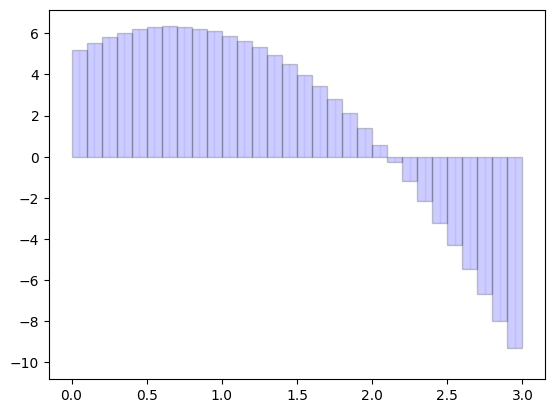

In [6]:
dx = 0.1

integral = 0                                    # integrální součet
x = a
i = 0
fig, ax = plt.subplots()                        # vytvoření grafu
while x < b:
    xp = (x + x+dx) / 2                         # střed intervalu
    height = f(xp)                              # výška obdélníků jako funkční hodnota středu intervalu
    #height = (f(x) + f(x + dx)) / 2            # lichoběžník
    integral += dx * height                     # přírůstek v intervalu dx - obdélník

    # objekty pro graf: Rectangle((x,y), šířka, výška, ...)
    rectangle = Rectangle((x, 0), dx, height, edgecolor='black', facecolor='blue', alpha=0.2)
    line = Rectangle((xp, 0), 0, height, edgecolor='b', facecolor='none', alpha=0.07)
    ax.add_patch(rectangle)
    ax.add_patch(line)

    x += dx

print("Obdélník:", integral)
ax.plot(x,f(x))                                 # graf
plt.show()


Lichoběžníkové pravidlo

Lichoběžník: 5.984999999999994


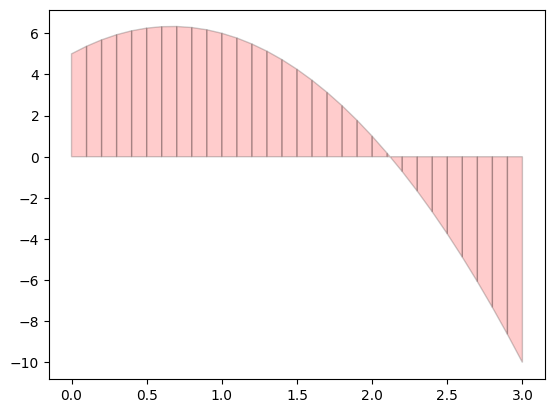

In [7]:
dx = 0.1

integral = 0                                    # integrální součet
x = a
i = 0
fig, ax = plt.subplots()                        # vytvoření grafu
while x < b:
    integral += dx * (f(x) + f(x+dx))/2         # obsah lichoběžníku

    # Vykreslení dílčího lichoběžníku
    trapezoid = Polygon([(x,0), (x,f(x)), (x+dx,f(x+dx)), (x+dx,0)],                # výpis jednotlivých bodů 
                       closed=True, edgecolor='black', facecolor='red', alpha=0.2)  # další parametry
    ax.add_patch(trapezoid)

    x += dx

print("Lichoběžník:", integral)
ax.plot(x,f(x))                                 # graf
plt.show()


Integrace ve formě Newtonových-Cotesových vzorců
$$
S = h \left[\frac{f(a) + f(b)}{2}\right] + h\sum_{i=1}^{n-1} f(x_i)
$$

In [8]:
n = int((b-a) // dx) + 1            # počet dělení (dx = h)
integral = (f(a) + f(b)) / 2        # závorka (násobení h až na konci) - často se dvojkou dělí na konci (suma se počítá dvakrát)
for i in range(1, n):               # suma
    integral += f(a + i*dx)
integral *= dx                      # násobení h
print("Newton-Cotes:", integral)

Newton-Cotes: 5.984999999999998


pomocí knihovny numpy

In [9]:
import numpy as np
x = np.arange(a, b+dx, dx)              # pravá mez není standardně započítávána
y = f(x)
#print(np.trapz(y, dx=dx))              # dnes nepodporováno
print("Lichoběžník (numpy):", np.trapezoid(y, dx=dx))           # trapezoid - lichoběžník (pole y, pole x)

Lichoběžník (numpy): 5.984999999999999


pomocí knihovny scipy

In [10]:
from scipy import integrate

scipy.integrate.trapezoid

In [11]:
# trapezoid
print("Lichoběžník (scipy; rozdíl dán zaokrouhlením):")
print("dán vektor x: ", integrate.trapezoid(y, x=x))          # první argument vždy funkce ve formě pole, druhý pole x
print(f"dáno dx={dx}:  ", end=" ")
print(integrate.trapezoid(y, dx=dx))        # druhý argument šířka vzorkování

Lichoběžník (scipy; rozdíl dán zaokrouhlením):
dán vektor x:  5.985
dáno dx=0.1:   5.984999999999999


scipy.integrate.simpson
$$S=\frac{(b-a)}{3}\ \ \left( f(a)+4f(\frac{a+b}{2})+f(b)\right)$$

In [12]:
# simpson
x = np.arange(a, b+dx, dx)
y = f(x)
print("Simpson:")
print(integrate.simpson(y=y, x=x))          # argumenty stejné jako trapezoid
print(integrate.simpson(y=y, dx=dx))        # neboli dx=x[1]-x[0]

Simpson:
6.0000000000000036
5.999999999999996


scipy.integrate.romb (Rombergova integrace)
- požaduje rovnoměrně rozmístěné body a počet vzorků musí být 2^k + 1

In [13]:
# romberg 
#print(integrate.romberg(f, a, b))          # funkce, ne pole - dnes zastaralé (nahrazeno quad)
x = np.linspace(a, b, 2**4 + 1)             # dělení musí být 2^n+1
y = f(x)                                    # pole
print(integrate.romb(y, dx=x[1]-x[0]))      # přesnost

6.0


scipy.integrate.quad (Adaptivní kvadraturní metoda - QUADPACK)
- automaticky volí body a velikosti kroků, aby dosáhla požadované přesnosti

In [20]:
# gaussian
result, error = integrate.quad(f, a, b)              # argumentem funkce - ne pole!
print(result, error)

6.000000000000002 1.5662313965009494e-13


### Samostatná cvičení

#### SCv.11.1: Symbolická matematika

Pomocí symbolické matematiky vypočítejte následující integrály. Zkuste předem odhadnout podmínky integrace a existence primitivní funkce.
$$
F(x) = \int_{-\infty}^{\infty} e^{-ax^2} {\rm d}x
$$

In [42]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

Příklad integrace

In [43]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = sympy.exp(-a*x**2)
#sympy.Integral(f, x).doit()        # pouze výpis, výpočet přes doit()
F = sympy.integrate(f, x)           # primitivní funkce
display(F)
display(sympy.integrate(f, (x, -np.inf, np.inf)))   # určitý integrál

Piecewise((sqrt(pi)*erf(sqrt(a)*x)/(2*sqrt(a)), Ne(a, 0)), (x, True))

Piecewise((sqrt(pi)/sqrt(a), Abs(arg(a)) <= pi/2), (Integral(exp(-a*x**2), (x, -oo, oo)), True))

Vykreslení (pomocí sympy)

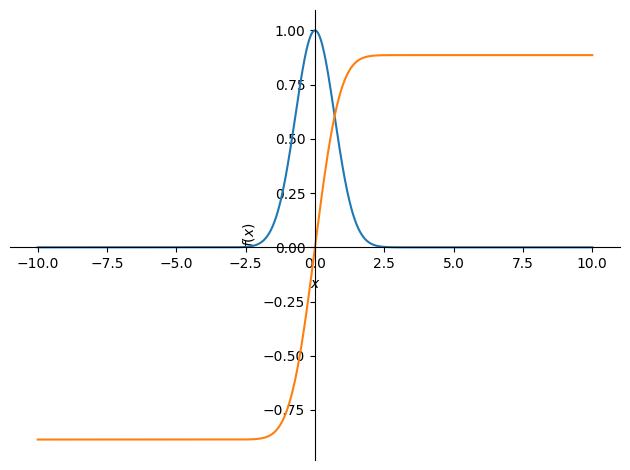

In [44]:
a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0));

Totéž pomocí matplotlib (nutno lambdifikovat)

sqrt(pi)*erf(x)/2
sqrt(pi)*erf(x)/2


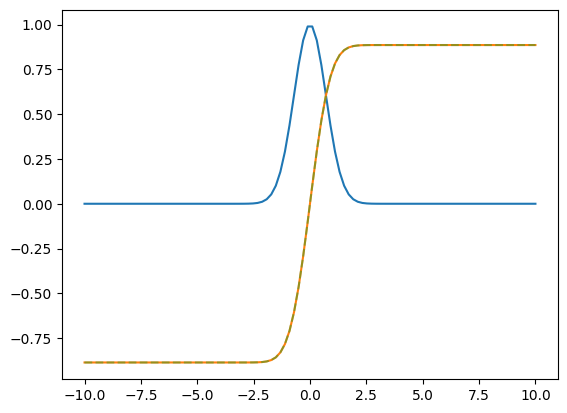

In [ ]:
f_np = sympy.lambdify(x, f.subs(a, a0), 'numpy')    # Vytvoření funkce f pro vyhodnocení výrazu
print(F.subs(a, a0))
F_np = sympy.lambdify(x, F.subs(a, a0), 'scipy')    # Vytvoření funkce F pro vyhodnocení výrazu

xs = np.linspace(-10,10,100)
ys = f_np(xs)
Ys = F_np(xs)
plt.plot(xs, ys, xs, Ys)

# Vykreslení výsledku zadaného přímo (předpisem)
G = sympy.sqrt(sympy.pi)/2*sympy.erf(x)
print(G)
G_np = sympy.lambdify(x, G, 'scipy')
Zs = G_np(xs)
plt.plot(xs, Zs, "--", alpha=0.5);

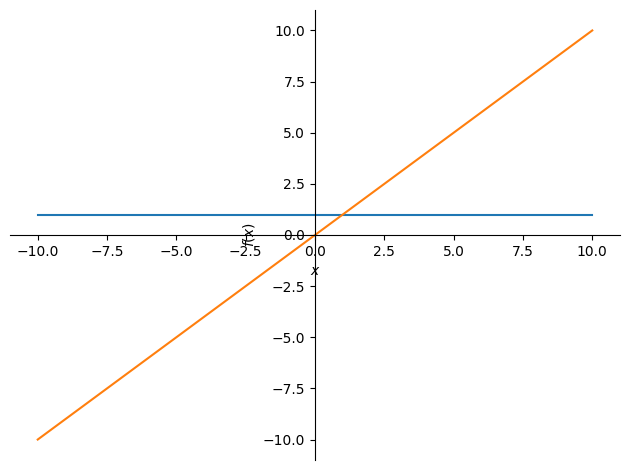

In [ ]:
# pro a = 0 je výsledek jiný
a0 = 0
sympy.plot(f.subs(a, a0), F.subs(a, a0));

$$
F(x) = \int x^a {\rm d}x
$$

Piecewise((x**(a + 1)/(a + 1), Ne(a, -1)), (log(x), True))

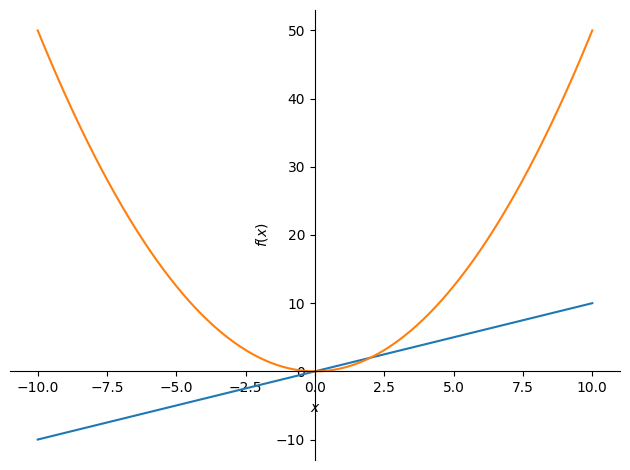

In [65]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = x**a
F = sympy.integrate(f, x)
display(F)

a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0));

Příklad těžko řešitelný pomocí sympy
$$
F(x) = \int \arccos(\sin x) {\rm d}x
$$

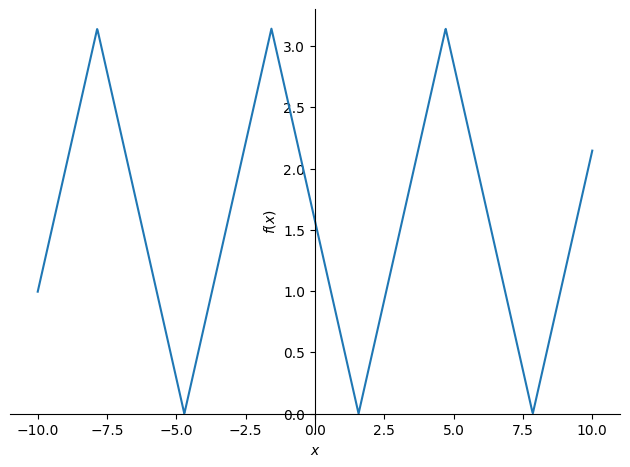

In [66]:
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
sympy.plot(f);

In [ ]:
# selhání analytické metody (výpočet trvá kolem minuty a vrátí to samé)
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
F = sympy.integrate(f, x)
display(F)

Integral(acos(sin(x)), x)

Vykreslení numericky pomocí scipy.integrate.cumulative_trapezoid

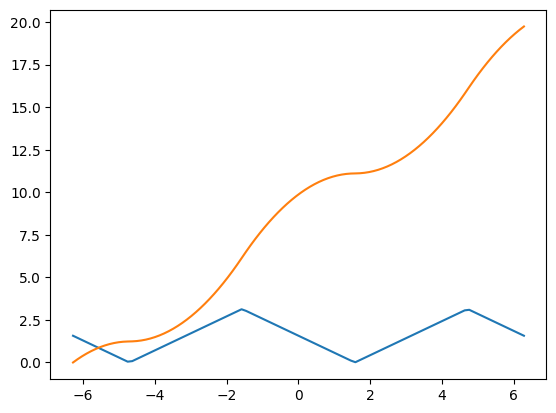

In [24]:
# vykreslení primitivní fce pomocí numerické metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.arccos(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 100)                    # testovací hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaralá metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypočet primitivní funkce numericky

plt.plot(xs, f(xs))                                         # vykreslení f
plt.plot(xs, Fs)                                            # vykreslení F
plt.show()


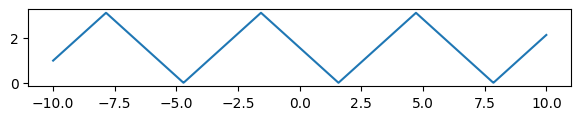

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):                                   # definice funkce arccos(sin(x))
    x_mod = (x - np.pi/2) % (2 * np.pi)     # periodické rozšíření na celý definiční obor
    if 0 <= x_mod <= np.pi:
        return x_mod
    else:
        return 2*np.pi - x_mod

xs = np.linspace(-10, 10, 1000)
ys = np.array([f(x) for x in xs])

# Vykreslení grafu
plt.figure(figsize=(7, 1))
plt.plot(xs, ys);


Piecewise((x, (x >= 0) & (x < pi)), (-x + 2*pi, (x >= pi) & (x < 2*pi)))

Piecewise((nan, x < 0), (x**2/2, x < pi), (-x**2/2 + 2*pi*x - pi**2, x < 2*pi), (nan, True))

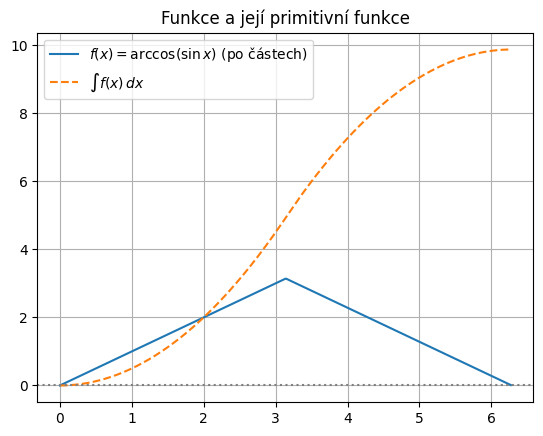

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x')      # symbolická proměnná

# Definice funkce po částech v intervalu [0, 2π]
f = sp.Piecewise(
    (x,             sp.And(x >= 0, x < sp.pi)),
    (2*sp.pi - x,   sp.And(x >= sp.pi, x < 2*sp.pi))
)
# Funkce pro periodický interval (nepůjde ale jednoduše integrovat)
fp = sp.Piecewise(
    (x,             sp.And(x % (2*sp.pi) >= 0, x % (2*sp.pi) < sp.pi)),
    (2*sp.pi - x,   sp.And(x % (2*sp.pi) >= sp.pi, x % (2*sp.pi) < 2*sp.pi))
)
display(f)

# Výpočet primitivní funkce
F = sp.integrate(f, x)
display(F)

# Volitelně: číselné zobrazení funkce a její primitivní funkce
f_lambd = sp.lambdify(x, f, 'numpy')
F_lambd = sp.lambdify(x, F, 'numpy')

xx = np.linspace(0, 2*np.pi, 500)
plt.plot(xx, f_lambd(xx), label=r'$f(x) = \arccos(\sin x)$ (po částech)')
plt.plot(xx, F_lambd(xx), label=r'$\int f(x)\,dx$', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.title("Funkce a její primitivní funkce")
plt.legend()
plt.grid(True)
plt.show()


$$
F(x) = \int \ln(\sin x) {\rm d}x
$$

Integral(log(sin(x)), x)


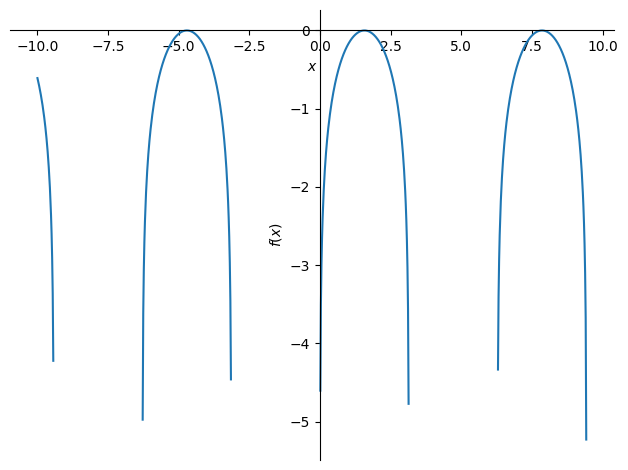

In [80]:
x = sympy.Symbol("x")
f = sympy.log(sympy.sin(x))
F = sympy.integrate(f, x)
print(F)
sympy.plot(f);

C:\Users\P\AppData\Local\Temp\ipykernel_18608\2235935891.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(np.sin(x))


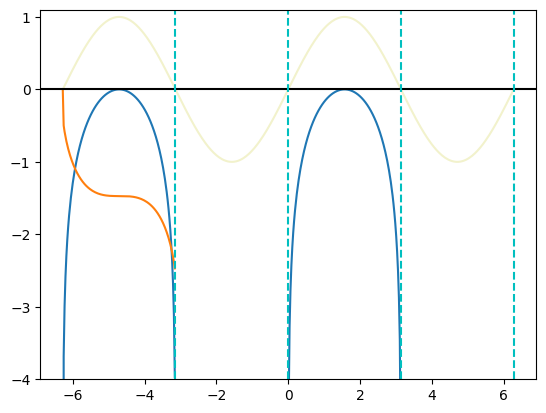

In [90]:
# vykreslení primitivní fce pomocí numerické metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.log(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 500)                    # testovací hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaralá metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypočet primitivní funkce numericky

plt.plot(xs, f(xs))                                         # vykreslení f = log(sin(x))
plt.plot(xs, Fs)                                            # vykreslení F
plt.plot(xs, np.sin(xs), color="y", alpha=0.2)              # sin pro porovnání
plt.axhline(y=0, color='k')
for i in range(-1, 3):                                      # 5 přímek v intervalu [0, 2*np.pi]
    plt.axvline(i*np.pi, color='c', linestyle='--')         # perioda pi

plt.ylim(-4,1.1)
plt.show()


#### SCv.11.2: Určitý integrál

Pomocí built-in funkcí nebo metod numerické matematiky vypočítejte následující určité integrály. Použijte alespoň tři různé integrační metody a porovnejte je mezi sebou z hlediska přesnosti výpočtu.
$$
\int_{0}^{2\pi} \sin(x) {\rm d}x
$$

In [32]:
import numpy as np
from scipy import integrate

def f(x):
    return np.sin(x)

a = 0
b = 2*np.pi
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
#print("romberg: ", integrate.romberg(f, a, b))

x = np.linspace(a, b, 2**4 + 1)             # musí být 2**n + 1
y = f(x)                                    # pole
print("romberg: ", integrate.romb(y=y, dx=dx))

trapezoid:  0.00014124579393251947
simpson:  0.00013721143474511267
romberg:  -2.710426224899907e-22


In [27]:
import sympy
x = sympy.Symbol("x")
# fce definovaná pomocí numpy je numerická, sympy potřebuje symbolické výrazy
def f(x):
    return sympy.sin(x)
display(sympy.integrate(f(x), x))       # primitivní fce
sympy.integrate(f(x), (x, a, b))        # určitý integrál

-cos(x)

0

$$
\int_{0}^{1} \left[ x^2 - 2x + 6 \right] {\rm d}x
$$

In [38]:
import numpy as np

def f(x):
    return x**2 - 2*x + 6

a = 0
b = 1
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
#print("romberg: ", integrate.romberg(f, a, b))
x = np.linspace(a, b, 2**4 + 1)
y = f(x)                                    # pole
print("romberg: ", integrate.romb(y=y, dx=x[1]-x[0]))


trapezoid:  5.335
simpson:  5.333333333333333
romberg:  5.333333333333333


In [39]:
import sympy
x = sympy.Symbol("x")
# fce definovaná pomocí numpy je numerická, sympy potřebuje symbolické výrazy
def f(x):
    return x**2 - 2*x + 6
display(sympy.integrate(f(x), x))       # primitivní fce
sympy.integrate(f(x), (x, a, b))        # určitý integrál

x**3/3 - x**2 + 6*x

16/3

$$
\int_0^{\pi/4} e^{3x}\sin(2x) {\rm d}x
$$

In [40]:
import numpy as np

def f(x):
    return np.exp(3*x)*np.sin(2*x)

a = 0
b = np.pi/4.
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
#print("romberg: ", integrate.romberg(f, a, b))
x = np.linspace(a, b, 2**4 + 1)
y = f(x)                                    # pole
print("romberg: ", integrate.romb(y=y, dx=x[1]-x[0]))

trapezoid:  2.771455172001907
simpson:  2.746005660082776
romberg:  2.5886286332438933


In [41]:
import sympy
x = sympy.Symbol("x")
# fce definovaná pomocí numpy je numerická, sympy potřebuje symbolické výrazy
def f(x):
    return sympy.exp(3*x)*sympy.sin(2*x)
display(sympy.integrate(f(x), x))       # primitivní fce
sympy.integrate(f(x), (x, a, b))        # určitý integrál

3*exp(3*x)*sin(2*x)/13 - 2*exp(3*x)*cos(2*x)/13

2.58862863250718

### Domácí cvičení

#### DCv.11.1: Newtonovy-Cotesovy vzorce
Naprogramujte si zbylé Newtonovy-Cotesovy vzorce (Simpsonovo pravidlo, Simpsonovo 3/8 pravidlo, Booleovo pravidlo) svépomocí a porovnejte jejich přesnost s lichoběžníkovým pravidlem. 

<img src="data/s11_nc.png" alt="Drawing" style="width: 600px;"/>

Kolik subintervalů potřebují jednotlivé metody, aby dosáhly dostatečné přenosti?

#### DCv.11.2: Interpolace a integrace

Následující tabulka obsahuje souřadnice hranice pozemku v metrech. Pomocí lichoběžníkové integrace zjistěte rozlohu pozemku v metrech čtverečních. Data také naleznete v souboru pozemek.txt.

<table>
    <thead style="background-color:#444444;">
        <td>x</td><td>y</td>
    </thead>
    <tr>
        <td>0</td><td>125</td>
    </tr>
    <tr>
        <td>100</td><td>125</td>
    </tr>
    <tr>
        <td>200</td><td>120</td>
    </tr>
    <tr>
        <td>300</td><td>112</td>
    </tr>
    <tr>
        <td>400</td><td>90</td>
    </tr>
    <tr>
        <td>500</td><td>90</td>
    </tr>
    <tr>
        <td>600</td><td>95</td>
    </tr>
    <tr>
        <td>700</td><td>88</td>
    </tr>
    <tr>
        <td>800</td><td>75</td>
    </tr>
    <tr>
        <td>900</td><td>35</td>
    </tr>
    <tr>
        <td>1000</td><td>0</td>
    </tr>

</table>

#### DCv.11.3: Rombergova integrace

Jeden ze způsobů, jak zvětšit přenost intergrace, je Richardsonova extrapolace (RE). 

Cílem RE je zlepšit integrační přenost eliminací chyb. 

Rombergova integrace (neboli Rombergova kvadratura) zlepšuje výsledek lichoběžníkové integrace odstraněním chyb Richardsonovou extrapolací. 

Zdroje k samostudiu: [CZ](http://physics.ujep.cz/~mlisal/nm_1/jskvor/PDF/IntegralRomberg.pdf) [EN](https://towardsdatascience.com/numerical-integration-romberg-integration-3f54002ab538)


$$𝑆(𝑛,𝑚)=𝑆(𝑛,𝑚−1)+(𝑆(𝑛,𝑚−1)−𝑆(𝑛−1,𝑚−1))/(4^𝑚−1)$$


In [49]:
def f(x):
    return np.exp(3*x)*np.sin(2*x)

def romberg(a, b, i, j):
    if j == 0:
        n = 2**i
        dx = (b-a)/n
        #return np.trapz(f(np.linspace(a, b, n)), dx=dx)        # zastaralé
        return np.trapezoid(f(np.linspace(a, b, n)), dx=dx)
    if 0 < j <= i:
        return romberg(a, b, i, j-1) + (romberg(a, b, i, j-1) - romberg(a, b, i-1, j-1))/(4**j - 1)

a = 0
b = np.pi/4.
print(romberg(a, b, i=10, j=5))

2.5870882254694396


Rombergova metoda - vlastní implementace a porovnání

Rombergova tabulka:
['0.0000000000']
['1.5707963268', '2.0943951024']
['1.8961188979', '2.0045597550', '1.9985707318']
['1.9742316019', '2.0002691699', '1.9999831309', '2.0000055500']
['1.9935703438', '2.0000165910', '1.9999997525', '2.0000000163', '1.9999999946']
['1.9983933610', '2.0000010334', '1.9999999962', '2.0000000001', '2.0000000000', '2.0000000000']
['1.9995983886', '2.0000000645', '1.9999999999', '2.0000000000', '2.0000000000', '2.0000000000', '2.0000000000']

Rombergova metoda:  2.0000000000
Trapezoidní metoda: 1.9995983886
Přesná hodnota:     2.0000000000


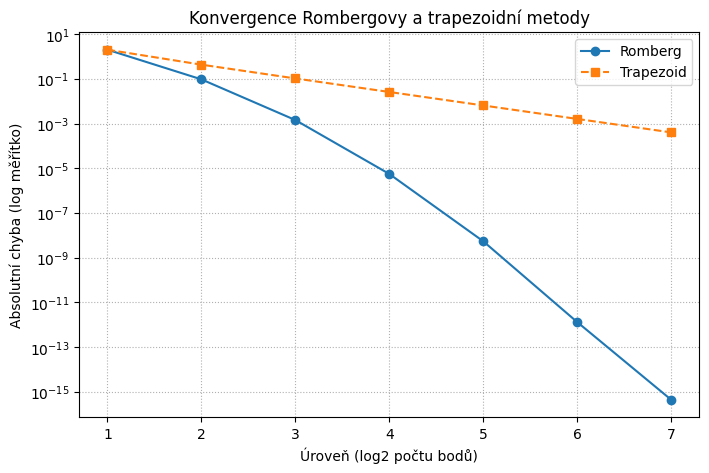

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):               # definovaná funkce k integraci
    return np.sin(x)

a = 0                   # interval integrace
b = np.pi
n = 7                   # počet úrovní (více pro hezkou konvergenci)

# 1. Rombergova integrace
R = np.zeros((n, n))    # vytvoříme prázdnou Rombergovu tabulku

h = b - a               # výpočet první úrovně: jednoduché trapezoidní pravidlo
R[0, 0] = (h / 2) * (f(a) + f(b))

for i in range(1, n):   # vyplňujeme tabulku
    h /= 2              # polovina kroku
    # Přičteme nové uzly: jsou uprostřed předchozích
    sum_new = sum(f(a + (k + 0.5) * 2 * h) for k in range(2**(i-1)))
    R[i, 0] = 0.5 * R[i-1, 0] + h * sum_new
    # Extrapolace směrem doprava (vyšší přesnosti)
    for k in range(1, i+1):
        R[i, k] = (4**k * R[i, k-1] - R[i-1, k-1]) / (4**k - 1)

# 2. Trapezoidní metoda bez zjemňování
def trapezoid_simple(f, a, b, n_intervals):
    x = np.linspace(a, b, n_intervals+1)
    y = f(x)
    h = (b - a) / n_intervals
    return (h/2) * (y[0] + 2*np.sum(y[1:-1]) + y[-1])

# 3. Přesná hodnota
exact = 2.0

# Výpis tabulky
print("Rombergova tabulka:")
for i in range(n):
    print(["{:.10f}".format(R[i, j]) for j in range(i+1)])

# Nejlepší odhad integrálu je pravý spodní roh
print(f"\nRombergova metoda:  {R[n-1, n-1]:.10f}")
# Porovnání s trapezoidní metodou
n_trap = 2**(n-1)
trap_result = trapezoid_simple(f, a, b, n_trap)
print(f"Trapezoidní metoda: {trap_result:.10f}")
print(f"Přesná hodnota:     {exact:.10f}")

# Graf chyb konvergence - výpočet chyb
romberg_errors = [abs(R[i, i] - exact) for i in range(n)]
trapezoid_errors = []

for i in range(1, n+1):
    n_trap = 2**(i-1)
    approx = trapezoid_simple(f, a, b, n_trap)
    trapezoid_errors.append(abs(approx - exact))

plt.figure(figsize=(8, 5))
plt.semilogy(range(1, n+1), romberg_errors, 'o-', label='Romberg')
plt.semilogy(range(1, n+1), trapezoid_errors, 's--', label='Trapezoid')
plt.xlabel('Úroveň (log2 počtu bodů)')
plt.ylabel('Absolutní chyba (log měřítko)')
plt.title('Konvergence Rombergovy a trapezoidní metody')
plt.grid(True, which="both", ls=":")
plt.legend()
plt.show()


#### Výpočet určitého integrálu metodou Monte Carlo

Jelikož Metodou Monte Carlo lze spočítat obsah nebo objem nějaké oblasti, lze s ní spočítat i určitý integrál. Opakování předchozí metody tedy vede k myšlence:
1. vygeneruj náhodné souřadnice x a fx
2. zjisti, zda spadají do oblasti, kterou funkce vytyčuje svou funkční hodnotou nad/pod osou x
3. započti nebo nezapočti zásah
4. spočítej integrál jako obsah oblasti pomocí procenta zásahů a obsahu omezující oblasti

Omezující oblast spočítáme jako obdélník, který je šiřoký jako definiční obor a vysoký jako obor hodnot. Zde se počítá s tím, že celý definiční obor je spojitý a stejně tak obor hodnot. Tento přístup (tzv. rejection sampling metoda) bude však značně nepřesný a také počítá integrál v absolutní hodnotě.

In [88]:
import random
import numpy as np
import matplotlib.pyplot as plt

Funkce $2x^2$ na intervalu <0, 2>

5.6


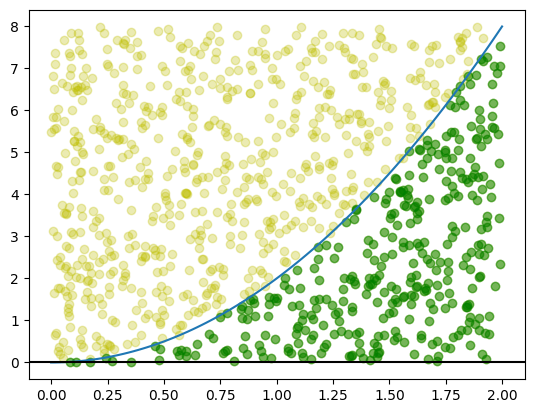

In [89]:
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x))
    plt.axhline(y=0, color='k')

    condition = fxs < f(xs)
    xf = xs[condition]
    yf = fxs[condition]
    plt.scatter(xs, fxs, color='y', alpha=0.3)
    plt.scatter(xf, yf, color='g', alpha=0.5)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # náhodné funkční hodnoty (pro porovnání)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spočítá hodnoty pod křivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obdélníku

f=lambda x: 2*x**2
print(integral(a=0, b=2, f=f, pocet_vzorku=1000))
plt.show()

y = 2x		 3.9432
-3*x**2 + 6	 0.6714
-3*x**2 + 6	 0.6488399999999999


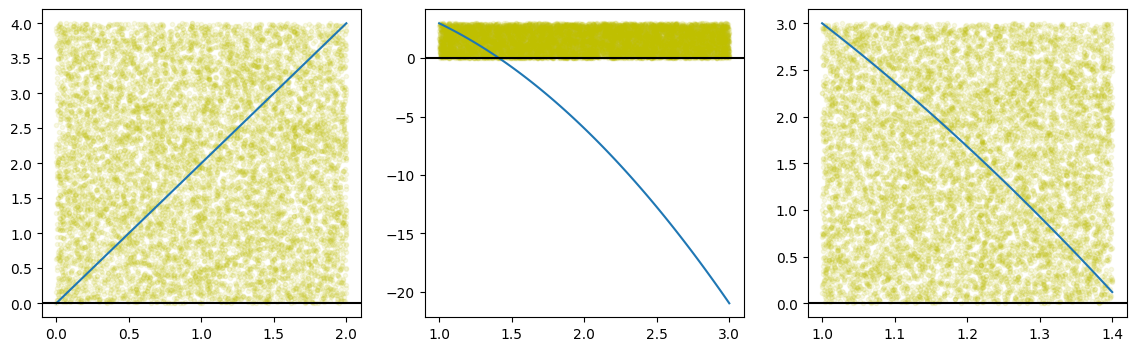

In [109]:
# původní podoba
i = 0                                                       # počitadlo grafů
fig, axs = plt.subplots(1, 3, figsize=(14, 4))              # 12" šířka, 4" výška
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # náhodné funkční hodnoty (pro porovnání)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spočítá hodnoty pod křivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obdélníku

# int_0^2(2*x) = _0^2[x**2] = 4 - 0 = 4
print("y = 2x\t\t", integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

# int_1^3(-3x**2+6) = _1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print("-3*x**2 + 6\t", integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
i += 1
print("-3*x**2 + 6\t", integral(a=1, b=1.4, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
# pod osou y se příspěvky neprojeví

plt.show()

In [ ]:
# výpočet analyticky
import sympy
x = sympy.Symbol("x")
f = -3*x**2 + 6
F = sympy.integrate(f, (x, 1, 3))           # primitivní funkce
F

-14

Správný výpočet pomocí horní i dolní závory
- pro funkce s hodnotami pod osou x nutná i dolní závora

In [ ]:
# příprava funkcí
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def plocha(a, b, f, pocet_vzorku):                          # plocha mezi křivkou a dolní závorou (to není integrál!)
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    min_f = min(f(np.linspace(a, b, 100000)))               # dolní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)     # náhodné funkční hodnoty (pro porovnání)
    fx_in_domain = [fx for x, fx in zip(xs, fxs) if fx <= f(x) and fx > 0 or fx >= f(x) and fx < 0]
    zasahy = len(fx_in_domain)
    zobraz(a, b, f, xs, fxs)
    return (b-a)*(max_f-min_f)*zasahy/pocet_vzorku

def integral(a, b, f, pocet_vzorku):                        # plocha pod křivkou nad osou x kladná, nad křivkou pod osou x záporná (viz např. sin(x))
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    min_f = min(f(np.linspace(a, b, 100000)))               # dolní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)
    kladna_plocha_zasahy = 0
    zaporna_plocha_zasahy = 0

    for x, fx in zip(xs, fxs):
        if 0 <= fx <= f(x):                                 # zásah nad osou x a pod křivkou
            kladna_plocha_zasahy += 1
        elif f(x) <= fx <= 0:                               # zásah pod osou x a nad křivkou
            zaporna_plocha_zasahy += 1

    S_obd = (b - a) * (max_f - min_f)
    procento_kladnych = kladna_plocha_zasahy / pocet_vzorku
    procento_zapornych = zaporna_plocha_zasahy / pocet_vzorku

    zobraz(a, b, f, xs, fxs)
    return S_obd * (procento_kladnych - procento_zapornych)

4.0392
0.3354
0.6765999999323387
-14.0016


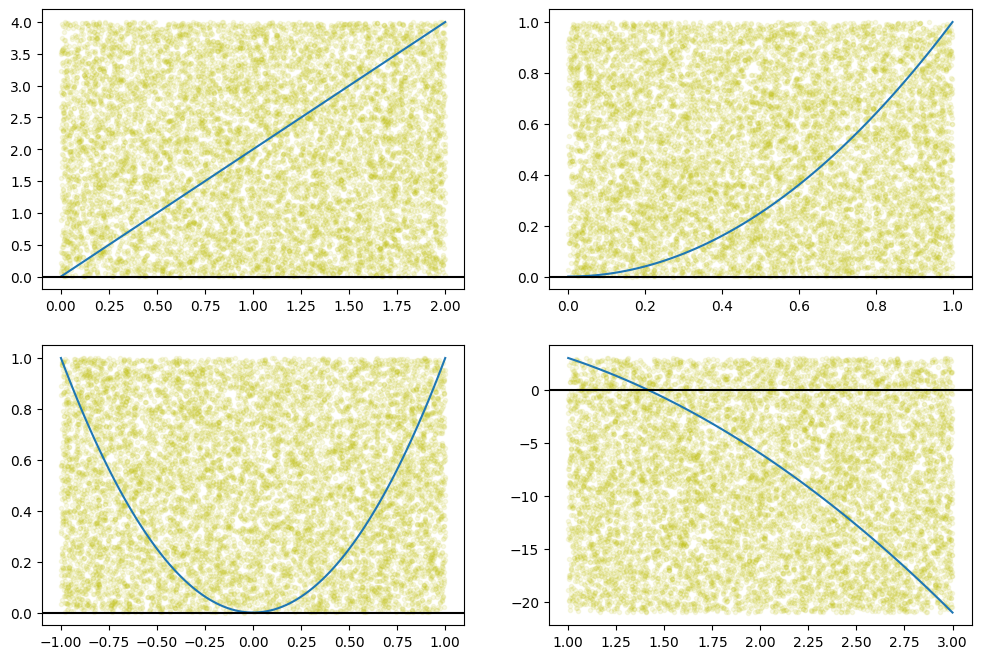

In [ ]:
# vlastní výpočet
i = 0                                                       # počitadlo grafů
fig, axs = plt.subplots(2, 2, figsize=(12, 8))              # 12" šířka, 8" výška

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

plt.show()

#### Cvičení 3: Integrál

Lepší řešení je náhodně vzorkovat prostor $(x,fx)$ a spočítat průměrnou navzorkovanou funkční hodnotu. Integrál se pak spočítá jako plocha oblasti od A do B na ose x a 0 do stredni hodnoty z navzorkovaných hodnot na ose y.
$$
\overline{I}_n \equiv \frac{1}{n} \sum_{i=1}^{n}I_i = \frac{b-a}{n} \sum_{i=1}^{n}g(a+(b-a)U_i)
$$
<!--img src="MS8_soubory/integral.png" alt="Drawing" style="width: 600px;"/-->

Vaším úkolem je naprogramovat výpočet integrálu touto metodou.

5.640508527454665


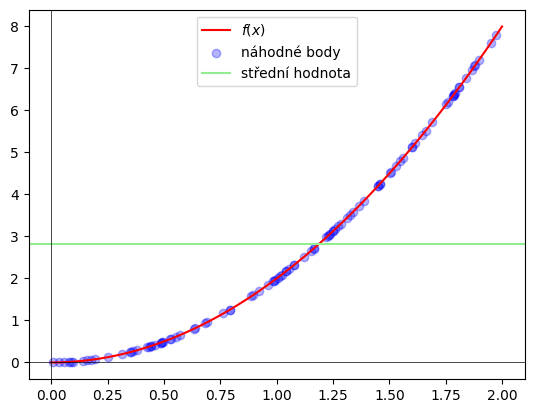

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs)), xs

f=lambda x: 2*x**2

integral_value, generated_xs = integral(a=0, b=2, f=f, n=100)
print(integral_value)

# Vytvoření grafu s vygenerovanými body
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)), color='red', label='$f(x)$')
plt.scatter(generated_xs, f(generated_xs), color='blue', alpha=0.3, label='náhodné body')
plt.axhline(integral_value/(2-0), color = "lightgreen", label="střední hodnota")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [55]:
def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs))

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, n=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, n=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, n=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, n=10000))

4.0248261623965185
0.33517470775000086
0.6694421389245027
-13.980189171764358
